In [28]:
import csv
import copy
import datetime
import matplotlib.pyplot as plt

In [29]:
priceList = []
every_4_years = []
halving_dates = ['2012-11','2016-07','2020-05','TBD']
non_zero = True

In [30]:
def open_CSV(fileName):
    with open(fileName, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            if len(row) == 1:
                continue
            else:
                #print(row[0][:7])
                #print(row[1].split(","))
                time, price = row[1].split(",")
                dt_obj = datetime.datetime.strptime(row[0], "%Y-%m-%d")
                #print(type(row[0])) TIME IN ARRAY IS STRING
                if non_zero:
                    if price != '0':
                        priceList.append([dt_obj,price])
                else:
                    priceList.append([row[0],price])
            if halving_dates[0] == row[0][:7]:
                #print("TESTING")
                every_4_years.append(copy.deepcopy(priceList))
                priceList.clear()
                halving_dates.remove(halving_dates[0])
        every_4_years.append(copy.deepcopy(priceList))
        priceList.clear()
        halving_dates.remove(halving_dates[0])
    return every_4_years

In [31]:
def plot_halves(datePrice):
    x=[]
    y=[]
    for index, dp in enumerate(datePrice):
        for date,price in datePrice[index]:
            #print(price)
            x.append(date)
            y.append(float(price))
        plt.figure()
        plt.plot(x,y)
        plt.gcf().autofmt_xdate()
        print(len(x),len(y))
        x.clear()
        y.clear()
    plt.show()

In [32]:
halves = open_CSV('BTCPrice.csv')

269 269
447 447
466 466
192 192


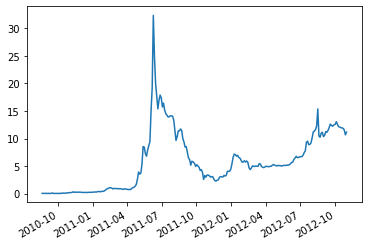

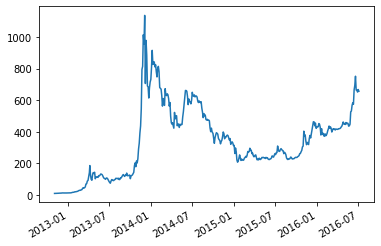

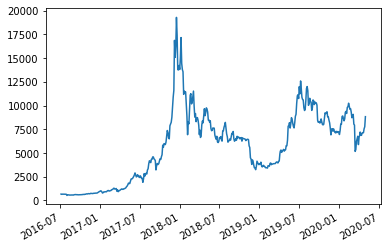

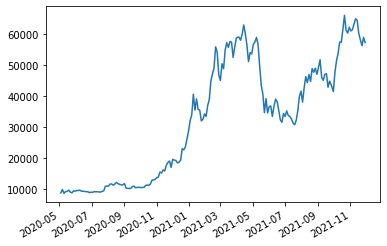

In [33]:
plot_halves(halves)